In [71]:
import numpy as np      #importing libraries
import pandas as pd

from sklearn_pandas import DataFrameMapper       #importing sklearn packages
import sklearn.preprocessing
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import xgboost     #importing xgboost
from xgboost import XGBClassifier

import matplotlib as plt   #importing matplotlib
%matplotlib inline
import matplotlib.pyplot as pplt
import seaborn as sns    #importing seaborn

import functools     #importing functools 

In [4]:
#importing train data
train_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

#importing test data
test_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [5]:
#setting column names 
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [6]:
train_set.head()    #displaying top 5 records

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
test_set.head()        #displaying top 5 records

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
train_set.dtypes     #datatypes of all features

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [10]:
train_set.shape     #shape of dataset

(32561, 15)

In [11]:
test_set.shape      #shape of dataset

(16281, 15)

In [12]:
train_set.workclass.value_counts()       #values of workclass

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [13]:
train_set.native_country.value_counts()       #values of native_country

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [15]:
"""Exploratory Data Analysis starts here"""
occupation_set = set(train_set['occupation'])      #unique values
print(occupation_set)

{' Armed-Forces', ' Adm-clerical', ' Priv-house-serv', ' Tech-support', ' Prof-specialty', ' Handlers-cleaners', ' Transport-moving', ' Sales', ' Other-service', ' Machine-op-inspct', ' Craft-repair', ' Exec-managerial', ' ?', ' Protective-serv', ' Farming-fishing'}


In [ ]:
#classifying them as numbers in train set
train_set['occupation'] = train_set['occupation'].map({' ?': 0, ' Farming-fishing': 1, ' Tech-support': 2, 
                                                       ' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,
                                                       ' Machine-op-inspct': 6, ' Exec-managerial': 7, 
                                                       ' Priv-house-serv': 8, ' Craft-repair': 9, ' Sales': 10, 
                                                       ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13, 
                                                       ' Protective-serv': 14}).astype(int)

In [18]:
#classifying them as numbers in test set
test_set['occupation'] = test_set['occupation'].map({' ?': 0, ' Farming-fishing': 1, ' Tech-support': 2, 
                                                       ' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,
                                                       ' Machine-op-inspct': 6, ' Exec-managerial': 7, 
                                                       ' Priv-house-serv': 8, ' Craft-repair': 9, ' Sales': 10, 
                                                       ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13, 
                                                       ' Protective-serv': 14}).astype(int)

In [19]:
train_set.head()    #displaying top 5 records

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,3,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,7,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,4,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,4,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,5,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
test_set.head()        #displaying top 5 records

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,6,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,1,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,14,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,6,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,United-States,<=50K.


In [21]:
#mapping wage_class into integer columns in train dataset
train_set['wage_class'] = train_set['wage_class'].map({' <=50K': 0, ' >50K': 1}).astype(int)

In [22]:
#mapping wage_class into integer columns in test dataset
test_set['wage_class'] = test_set['wage_class'].map({' <=50K.': 0, ' >50K.': 1}).astype(int)

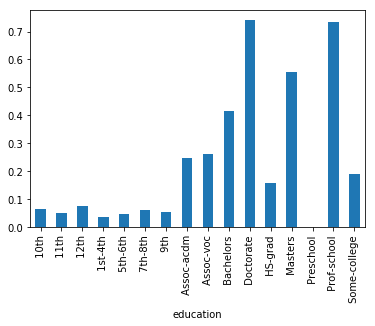

In [24]:
#plotting graph between wage_class & education 
train_set.groupby('education')['wage_class'].mean().plot(kind='bar')

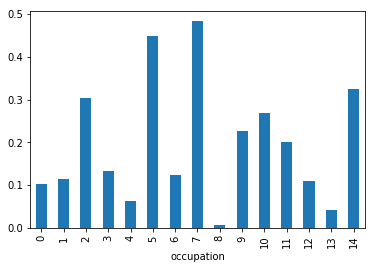

In [25]:
#plotting graph between wage_class & occupation 
train_set.groupby('occupation')['wage_class'].mean().plot(kind='bar')

In [26]:
train_set['sex'] = train_set['sex'].map({' Male': 0, ' Female': 1}).astype(int)     #changing Sex into 0 and 1
test_set['sex'] = test_set['sex'].map({' Male': 0, ' Female': 1}).astype(int)

In [27]:
race_set = set(train_set['race'])     #unique races
print(race_set)

{' Black', ' Asian-Pac-Islander', ' Other', ' White', ' Amer-Indian-Eskimo'}


In [28]:
#mapping races to integer values in train & test dataset
train_set['race'] = train_set['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4}).astype(int)
test_set['race'] = test_set['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4}).astype(int)

In [29]:
mstatus_set = set(train_set['marital_status'])   #marital  status values
print(mstatus_set)

{' Married-AF-spouse', ' Never-married', ' Widowed', ' Divorced', ' Married-spouse-absent', ' Married-civ-spouse', ' Separated'}


In [30]:
#mapping maritial status to integer values in train & test dataset
train_set['marital_status'] = train_set['marital_status'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4, 
                                                             ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)
test_set['marital_status'] = test_set['marital_status'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4, 
                                                             ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)

In [31]:
train_set.head()    #displaying top 5 records

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,5,3,Not-in-family,3,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,2,7,Husband,3,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,4,4,Not-in-family,3,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,2,4,Husband,0,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,2,5,Wife,0,1,0,0,40,Cuba,0


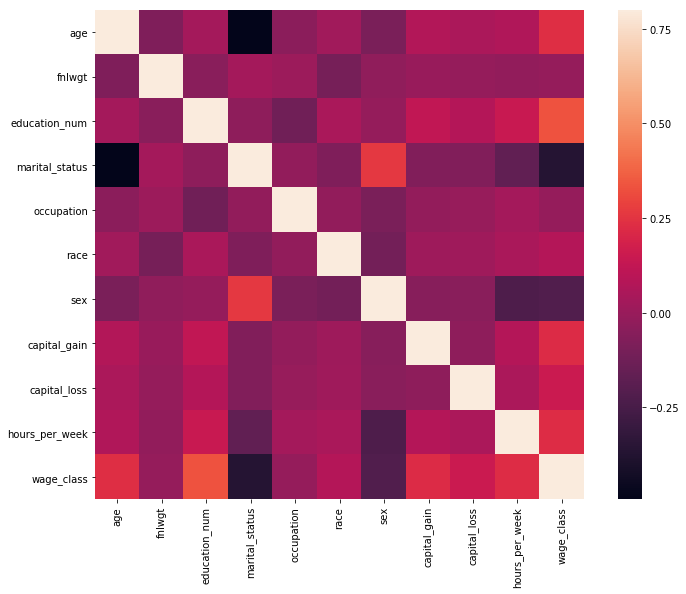

In [33]:
corrmat = train_set.corr()      #correlation matrix
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

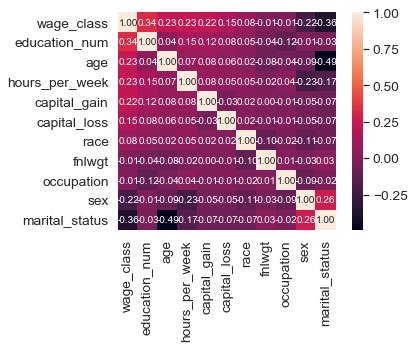

In [34]:
k = 11        #number of variables for heatmap
cols = corrmat.nlargest(k, 'wage_class')['wage_class'].index
cm = np.corrcoef(train_set[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

In [35]:
""" PROBLEM STATEMENT 2 - ANSWER: 'education_num' , 'age' , 'hours_per_week', 'capital_gain' ,' capital_loss' and 'race' 
are effecting to the wage_class(income) of the person.
So we will use only these features for our machine learning model."""

" 'education_num' , 'age' , 'hours_per_week', 'capital_gain' ,' capital_loss' and 'race' are effecting to the wage_class(income) of the person.\nSo we will use only these features for our machine learning model."

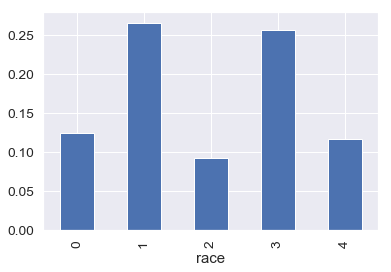

In [36]:
train_set.groupby('race')['wage_class'].mean().plot(kind='bar')    #plotting income classified by race

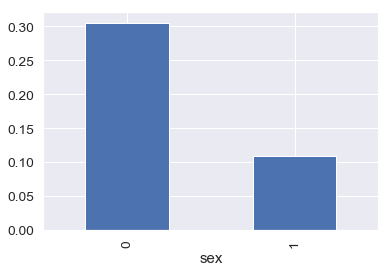

In [37]:
train_set.groupby('sex')['wage_class'].mean().plot(kind='bar')      #plotting income classified by sex

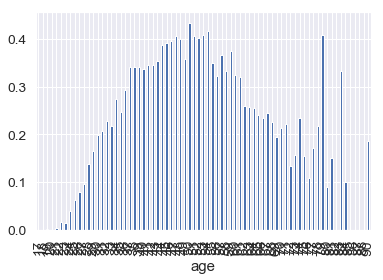

In [38]:
train_set.groupby('age')['wage_class'].mean().plot(kind='bar')      #plotting income classified by age

In [39]:
"""
Conclusion:
We have explored data & came to know that

1.Income follows normal deviation approximately, with a peak at 50 years old.
2.Men have more chances of higher income.
3.White & Asian Pacific Islanders have more chances than other races.

"""

'\nConclusion:\nWe have explored data & came to know that\n\n1.Income follows normal deviation approximately, with a peak at 50 years old.\n2.Men have more chances of higher income.\n3.White & Asian Pacific Islanders have more chances than other races.\n\n'

In [40]:
X_train = train_set[['education_num', 'age', 'hours_per_week', 'capital_gain']]   #considering important features
Y_train = train_set['wage_class']     #label income
X_test = test_set[['education_num', 'age', 'hours_per_week', 'capital_gain']]     #considering important features
Y_test = test_set['wage_class']      #label income

In [42]:
"""Logistic Regression Classification Model:"""

'Logistic Regression Classification Model:'

In [43]:
classifier1 = LogisticRegression(solver='lbfgs',max_iter=4000)    #instance of model 
classifier1.fit(X_train,Y_train)     #instance of Logistic Regression Classifier & fitting data.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
predictions1 = classifier1.predict(X_test)      #predicting test results 
predictions1

array([0, 0, 0, ..., 0, 1, 0])

In [46]:
cm1=confusion_matrix(Y_test,predictions1)   #confusion matrix
cm1

array([[11769,   666],
       [ 2441,  1405]], dtype=int64)

In [47]:
accuracy1=accuracy_score(Y_test,predictions1)     #predicting accuracy 
print("Accuracy of the Logistic Regression Model is : " +str(accuracy1*100) +" %")

Accuracy of the Logistic Regression Model is : 80.91640562619004 %


In [48]:
"""Decision Tree Classification Model:"""

'Decision Tree Classification Model:'

In [50]:
classifier2 = DecisionTreeClassifier(criterion='entropy')      #instance of DecisionTreeClassifier

In [51]:
classifier2.fit(X_train,Y_train)     #fitting data

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
predictions2 = classifier2.predict(X_test)       #predicting test results 

In [53]:
cm2=confusion_matrix(Y_test,predictions2)   #confusion matrix
cm2

array([[11478,   957],
       [ 2216,  1630]], dtype=int64)

In [55]:
accuracy2=accuracy_score(Y_test,predictions2)     #predicting accuracy 
print("Accuracy of the Logistic Regression Model is : " +str(accuracy2*100) +" %")

Accuracy of the Logistic Regression Model is : 80.51102512130704 %


In [56]:
"""RandomForest Classification Model:"""

'RandomForest Classification Model:'

In [58]:
classifier3 = RandomForestClassifier(random_state=0,n_estimators=100)    #instance of RandomForestRegressor model
classifier3.fit(X_train,Y_train)     #fitting data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [60]:
predictions3 = classifier3.predict(X_test)     #predicting test results 
predictions3

array([0, 0, 0, ..., 1, 0, 0])

In [61]:
cm3=confusion_matrix(Y_test,predictions3)   #confusion matrix
cm3

array([[11479,   956],
       [ 2139,  1707]], dtype=int64)

In [63]:
accuracy3=accuracy_score(Y_test,predictions3)     #predicting accuracy 
print("Accuracy of the Logistic Regression Model is : " +str(accuracy3*100) +" %")

Accuracy of the Logistic Regression Model is : 80.9901111725324 %


In [64]:
"""XGBoost Classification model:"""

'XGBoost Classification model:'

In [66]:
#instance of XGBoost classifier
classifier4 = XGBClassifier(bootstrap=False,n_estimators=300,criterion='gini',random_state=0,max_depth=10,max_features=2,min_samples_leaf=1)

#fitting data
classifier4.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=False,
       colsample_bylevel=1, colsample_bytree=1, criterion='gini', gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=10, max_features=2,
       min_child_weight=1, min_samples_leaf=1, missing=None,
       n_estimators=300, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [67]:
predictions4 = classifier4.predict(X_test)     #predicting test results 
predictions4

array([0, 0, 0, ..., 1, 0, 0])

In [68]:
cm4=confusion_matrix(Y_test,predictions4)   #confusion matrix
cm4

array([[11744,   691],
       [ 2085,  1761]], dtype=int64)

In [70]:
accuracy4=accuracy_score(Y_test,predictions4)     #predicting accuracy 
print("Accuracy of the Logistic Regression Model is : " +str(accuracy4*100) +" %")

Accuracy of the Logistic Regression Model is : 82.94945027946686 %


In [72]:
accuracies1 = cross_val_score(estimator=classifier1,X = X_train,y = Y_train,cv = 10)   #accuracies set
accuracies2 = cross_val_score(estimator=classifier2,X = X_train,y = Y_train,cv = 10)
accuracies3 = cross_val_score(estimator=classifier3,X = X_train,y = Y_train,cv = 10)
accuracies4 = cross_val_score(estimator=classifier4,X = X_train,y = Y_train,cv = 10)

In [73]:
print("Mean Accuracy of Logistic Regression Model is : " + str(accuracies1.mean()*100) + " %")     #mean of accuracies

Mean Accuracy of Logistic Regression Model is : 80.97110721266387 %


In [74]:
print("Mean Accuracy of Decision Tree Model is : " + str(accuracies2.mean()*100) + " %")     #mean of accuracies

Mean Accuracy of Decision Tree Model is : 80.29851221975876 %


In [75]:
print("Mean Accuracy of Random Forest Classifier Model is : " + str(accuracies3.mean()*100) + " %")    #mean of accuracies

Mean Accuracy of Random Forest Classifier Model is : 80.77454230125399 %


In [76]:
print("Mean Accuracy of XG Boost Classification Model is : " + str(accuracies4.mean()*100) + " %")     #mean of accuracies

Mean Accuracy of XG Boost Classification Model is : 82.71246527041738 %


In [81]:
"""
XGBOOST IS THE BEST ALGORITHM FOR THE BEST PREDICTION OF THE GIVEN DATA.
THE ALGORITHMS & THEIR ACCURACIES ARE
1.Logistic regression - 80.97110721266387 %
2. Decision tree classifier - 80.29851221975876 %
3. Random Forest classifier - 80.77454230125399 %
4. Xgboost - 82.71246527041738 %   """

'\nXGBOOST IS THE BEST ALGORITHM FOR THE BEST PREDICTION OF THE GIVEN DATA.\nTHE ALGORITHMS & THEIR ACCURACIES ARE\n1.Logistic regression - 80.97110721266387 %\n2. Decision tree classifier - 80.29851221975876 %\n3. Random Forest classifier - 80.77454230125399 %\n4. Xgboost - 82.71246527041738 %   '